In [1]:
#今回のデータはアメリカのボストン近郊での住宅の価格に関するデータです。
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]

In [2]:
#その特徴量としてLSTATを使うことにします。先ほどのデータフレームからnumpy arrayに念のためデータを写しておきましょう。
x=X['LSTAT'].values

In [3]:
print(x)
X['LSTAT'].head()

[  4.98   9.14   4.03   2.94   5.33   5.21  12.43  19.15  29.93  17.1
  20.45  13.27  15.71   8.26  10.26   8.47   6.58  14.67  11.69  11.28
  21.02  13.83  18.72  19.88  16.3   16.51  14.81  17.28  12.8   11.98
  22.6   13.04  27.71  18.35  20.34   9.68  11.41   8.77  10.13   4.32
   1.98   4.84   5.81   7.44   9.55  10.21  14.15  18.8   30.81  16.2
  13.45   9.43   5.28   8.43  14.8    4.81   5.77   3.95   6.86   9.22
  13.15  14.44   6.73   9.5    8.05   4.67  10.24   8.1   13.09   8.79
   6.72   9.88   5.52   7.54   6.78   8.94  11.97  10.27  12.34   9.1
   5.29   7.22   6.72   7.51   9.62   6.53  12.86   8.44   5.5    5.7
   8.81   8.2    8.16   6.21  10.59   6.65  11.34   4.21   3.57   6.19]


0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [5]:
type(y)

numpy.ndarray

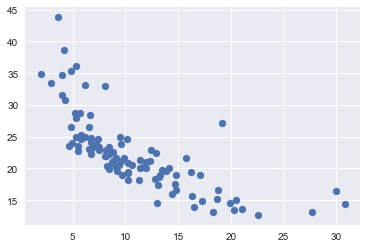

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(x,y)

# 単回帰

In [29]:
#線形回帰のインスタンスを用意します。

from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()

In [30]:
# 次にデータに合う傾きと切片を求めるのですが、たったひとつのコマンドだけで求めることが可能です。
# scikit learnでは、fit関数に渡す引数xは、行列である必要があるので、x[:,None]とすることで、xをベクトルから行列に変換しています。
lin_1d.fit(x[:,None],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
x.ndim

1

In [32]:
#fit関数に渡す引数xは、行列である必要があるので、x[:,None]
x[:,None].ndim

2

In [33]:
lin_1d.predict(2)
lin_1d.predict(10)
lin_1d.predict(25)

array([ 11.30238006])

[]

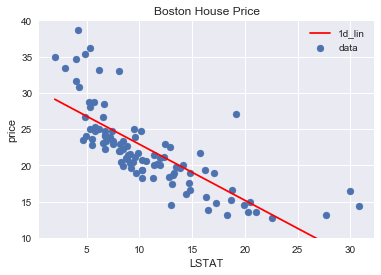

In [34]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

[]

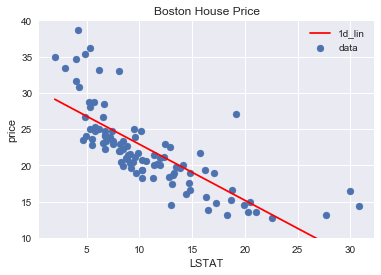

In [35]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

# 多項式回帰

In [2]:
from sklearn.preprocessing import PolynomialFeatures
degree_2=PolynomialFeatures(degree=2)

In [3]:
#ｘ軸の特徴量の2乗の成分が必要 ｘ軸の特徴量の2乗の成分が必要
x_2=degree_2.fit_transform(x[:,None])

NameError: name 'x' is not defined

In [4]:
x_2

NameError: name 'x_2' is not defined

In [5]:
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)

NameError: name 'x_2' is not defined

[]

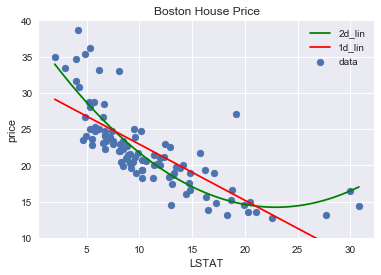

In [40]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [42]:
from sklearn.metrics import mean_squared_error
#まずは1次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_1d.predict(x[:,None]))


15.537906007479375

In [44]:
#次には２次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_2d.predict(x_2))

10.920226905348915

# 過学習

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

y_plot=[]
dim=[1,3,5,10,20]

for i in dim:
    degree_=PolynomialFeatures(degree=i)
    x_=degree_.fit_transform(x[:,None])
    lin_ = LinearRegression(normalize=True)
    #normalize=Trueは入力データを正規化してトレーニングすることを意味します。    
    lin_.fit(x_,y)
    #グラフのプロット用のデータをリストに格納しておきます
    n = np.linspace(np.min(x),np.max(x), 1000)
    y_=lin_.predict(degree_.fit_transform(n[:,np.newaxis]))
    y_plot.append(y_)

[]

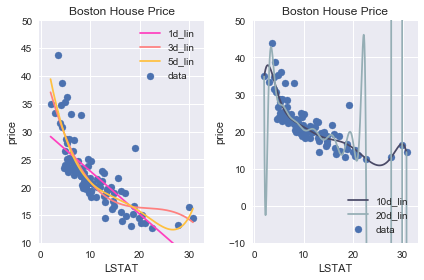

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

j=1
plt.subplot(1,2,1)
for i,y__ in zip(dim[:3],y_plot[:3]):
    c = cm.spring(float(j) / 4)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.legend()

j=1
plt.subplot(1,2,2)
for i,y__ in zip(dim[3:],y_plot[3:]):
    c = cm.bone(float(j) / 3)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(-10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')

plt.tight_layout()
plt.legend()
plt.plot()

# 正則化

In [13]:
degree_=PolynomialFeatures(degree=20)
x_=degree_.fit_transform(x[:,None])
lin_ = LinearRegression(normalize=True)
lin_.fit(x_,y)
print(lin_.coef_)

[  0.00000000e+00  -7.13256459e+04   6.50440670e+04  -3.43784845e+04
   1.17255053e+04  -2.69773859e+03   4.17953455e+02  -4.00028387e+01
   1.26419318e+00   2.63567163e-01  -5.03631953e-02   4.71752978e-03
  -2.79455526e-04   1.02566313e-05  -1.56452511e-07  -5.64527386e-09
   4.36265983e-10  -1.36537676e-11   2.45537872e-13  -2.48005250e-15
   1.09809897e-17]


In [17]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

y_plot=[]
deg=[1,3,5,10,20]

for i in deg:
    degree_=PolynomialFeatures(degree=i)
    x_=degree_.fit_transform(x[:,None])
    lin_ = Ridge(normalize=True,alpha=0.0001)
    #normalize=Trueは入力データを正規化してトレーニングすることを意味します。
    lin_.fit(x_,y)
    #グラフのプロット用のデータをリストに格納しておきます
    n = np.linspace(np.min(x),np.max(x), 1000)
    y_=lin_.predict(degree_.fit_transform(n[:,np.newaxis]))
    y_plot.append(y_)

[]

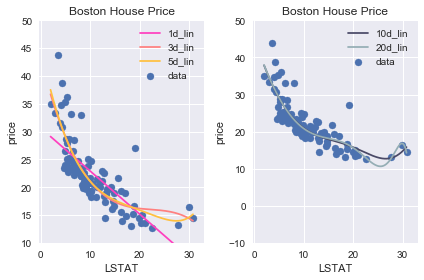

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

j=1
plt.subplot(1,2,1)
for i,y__ in zip(dim[:3],y_plot[:3]):
    c = cm.spring(float(j) / 4)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.legend()

j=1
plt.subplot(1,2,2)
for i,y__ in zip(dim[3:],y_plot[3:]):
    c = cm.bone(float(j) / 3)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(-10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')

plt.tight_layout()
plt.legend()
plt.plot()

In [15]:
degree_=PolynomialFeatures(degree=20)
x_=degree_.fit_transform(x[:,None])
lin_ = Ridge(normalize=True,alpha=0.0001)
lin_.fit(x_,y)
print(lin_.coef_)

[  0.00000000e+00  -4.00033949e+00   1.49942374e-01   1.60674387e-03
  -6.67032149e-05  -2.93360124e-06  -6.17985155e-08  -5.49693879e-10
   1.91193729e-11   1.32234097e-12   5.15440135e-14   1.61901329e-15
   4.38489227e-17   1.01688037e-18   1.82671867e-20   1.22308376e-22
  -9.73178287e-24  -6.80611887e-25  -3.07369281e-26  -1.16361215e-27
  -3.92765562e-29]
